# ATP Tennis Data - All Matchup Data



Raw Data:
* matchup wins
* matchup losses
* matchup sets won
* matchup games won

Percentage Data:
* matchup win percentage = total matchup won / total matchup played
* matchup sets won percentage = total matchup sets won / total matchup sets played
* matchup games won percentage = total matchup games won / total matchup games played

Diff:
* p1_matchup_wins_diff = player 1 matchup wins - player 2 matchup wins
* p1_matchup_games_diff = player 1 matchup games won - player 2 matchup games won
* p1_matchup_sets_diff = player 1 matchup sets won - player 2 matchup sets won

### Results from Decision Tree Classifier with player diff + one hot encoded player ID's:



# Summary of Results



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, REPORT_FILE, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "ohe-matchup_all"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-ohe-history5-matchup5.csv'

START_YEAR = 1998
END_YEAR = 2018



In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

Our dataset actually has both historical data as well as matchup data. We will remove the matchup columns from the dataset

In [3]:
import re
history_columns = [col for col in X_train.columns if re.search("history", col)]

print(history_columns)

print(f'Before: X_train.shape {X_train.shape} X_test.shape {X_test.shape}')
X_train = X_train.drop(history_columns, axis=1)
X_test = X_test.drop(history_columns, axis=1)
print(f'After: X_train.shape {X_train.shape} X_test.shape {X_test.shape}')

['p1_history_games_lost', 'p1_history_games_won', 'p1_history_games_won_percentage', 'p1_history_losses', 'p1_history_sets_lost', 'p1_history_sets_won', 'p1_history_sets_won_percentage', 'p1_history_win_percentage', 'p1_history_wins', 'p2_history_games_lost', 'p2_history_games_won', 'p2_history_games_won_percentage', 'p2_history_losses', 'p2_history_sets_lost', 'p2_history_sets_won', 'p2_history_sets_won_percentage', 'p2_history_win_percentage', 'p2_history_wins', 'p1_history_win_percentage_diff', 'p1_history_games_won_percentage_diff', 'p1_history_sets_won_percentage_diff', 'p1_history_wins_diff', 'p1_history_losses_diff', 'p1_history_matches', 'p2_history_matches']
Before: X_train.shape (44429, 5299) X_test.shape (14810, 5299)
After: X_train.shape (44429, 5274) X_test.shape (14810, 5274)


In [4]:
[col for col in X_train.columns if re.search("matchup", col)]

['p1_matchup_games',
 'p1_matchup_games_won_percentage',
 'p1_matchup_losses',
 'p1_matchup_sets',
 'p1_matchup_sets_won_percentage',
 'p1_matchup_win_percentage',
 'p1_matchup_wins',
 'p2_matchup_games',
 'p2_matchup_games_won_percentage',
 'p2_matchup_losses',
 'p2_matchup_sets',
 'p2_matchup_sets_won_percentage',
 'p2_matchup_win_percentage',
 'p2_matchup_wins',
 'p1_matchup_wins_diff',
 'p1_matchup_games_diff',
 'p1_matchup_sets_diff']

# Logistic Regression

In [5]:
lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.661985145172181

ROC/AUC Score: 0.6619864090621037
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66      7381
         Win       0.66      0.66      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4889  2492
Win   2514  4915


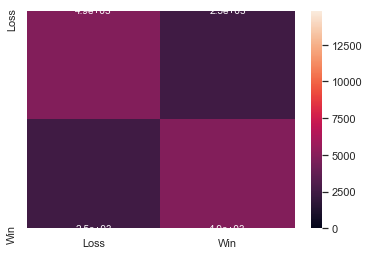

In [6]:
lr.analyze()

In [7]:
# ju.plot_2d(X_test, y_predict_lr)

In [8]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [9]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.6107359891964889

ROC/AUC Score: 0.6107540034550809
              precision    recall  f1-score   support

        Loss       0.61      0.62      0.61      7381
         Win       0.61      0.61      0.61      7429

    accuracy                           0.61     14810
   macro avg       0.61      0.61      0.61     14810
weighted avg       0.61      0.61      0.61     14810

      Loss   Win
Loss  4549  2832
Win   2933  4496


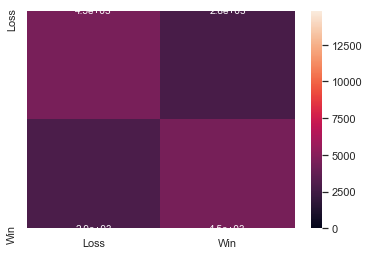

In [10]:
knn.analyze()

In [11]:
# ju.plot_2d(X_test, y_predict_knn)

In [12]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [13]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.6041188386225523

ROC/AUC Score: 0.6041332818586699
              precision    recall  f1-score   support

        Loss       0.60      0.61      0.61      7381
         Win       0.61      0.60      0.60      7429

    accuracy                           0.60     14810
   macro avg       0.60      0.60      0.60     14810
weighted avg       0.60      0.60      0.60     14810

      Loss   Win
Loss  4492  2889
Win   2974  4455


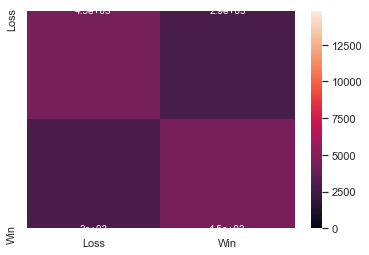

In [14]:
dt.analyze()

In [15]:
# ju.plot_2d(X_test, y_predict_dt)

In [16]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [17]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.6337609723160027

ROC/AUC Score: 0.6340114224804645
              precision    recall  f1-score   support

        Loss       0.61      0.71      0.66      7381
         Win       0.66      0.56      0.60      7429

    accuracy                           0.63     14810
   macro avg       0.64      0.63      0.63     14810
weighted avg       0.64      0.63      0.63     14810

      Loss   Win
Loss  5250  2131
Win   3293  4136


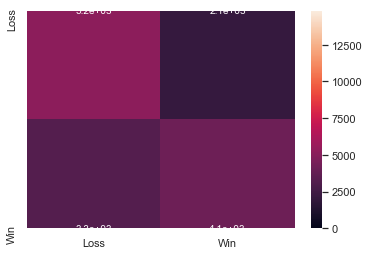

In [18]:
rf.analyze()

In [19]:
# ju.plot_2d(X_test, y_predict_rf)

In [20]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [21]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3670            9.42m
         2           1.3505            9.28m
         3           1.3357            8.98m
         4           1.3238            8.84m
         5           1.3130            8.70m
         6           1.3043            8.60m
         7           1.2957            8.49m
         8           1.2887            8.39m
         9           1.2822            8.27m
        10           1.2766            8.16m
        20           1.2380            7.41m
        30           1.2150            6.52m
        40           1.1918            5.52m
        50           1.1810            4.58m
        60           1.1740            3.66m
        70           1.1658            2.74m
        80           1.1617            1.81m
        90           1.1592           54.05s
       100           1.1569            0.00s


Model Score: 0.6833896016205266

ROC/AUC Score: 0.6833724885698873
              precision    recall  f1-score   support

        Loss       0.68      0.68      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810

      Loss   Win
Loss  5005  2376
Win   2313  5116


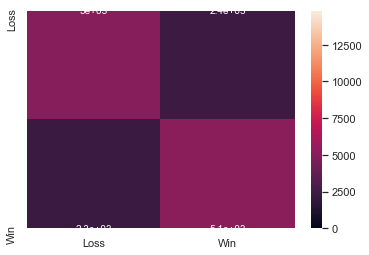

In [22]:
gb.analyze()

In [23]:
# ju.plot_2d(X_test, y_predict_gb)

In [24]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [25]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6664415935178933

ROC/AUC Score: 0.666390381535183
              precision    recall  f1-score   support

        Loss       0.67      0.65      0.66      7381
         Win       0.66      0.68      0.67      7429

    accuracy                           0.67     14810
   macro avg       0.67      0.67      0.67     14810
weighted avg       0.67      0.67      0.67     14810

      Loss   Win
Loss  4802  2579
Win   2361  5068


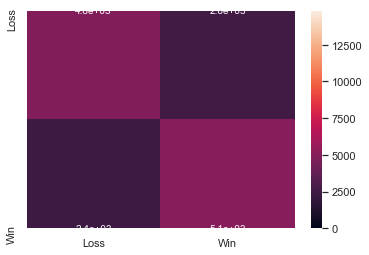

In [26]:
ab.analyze()

In [27]:
# ju.plot_2d(X_test, y_predict_ab)

In [28]:
ab.save()

Saving report: ../reports/summary.csv


# Results

In [29]:
report = pd.read_csv(REPORT_FILE)
report.tail(6)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
72,LogisticRegression,ohe-matchup_all,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.661985,0.661986,"{""0"": {""0"": 4889, ""1"": 2514}, ""1"": {""0"": 2492,...","{""Loss"": {""precision"": 0.660407942725922, ""rec...",../models/logisticregression-1998-2018-ohe-mat...,0.0,0.0,0.0
73,KNeighborsClassifier,ohe-matchup_all,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.610736,0.610754,"{""0"": {""0"": 4549, ""1"": 2933}, ""1"": {""0"": 2832,...","{""Loss"": {""precision"": 0.6079925153702219, ""re...",../models/kneighborsclassifier-1998-2018-ohe-m...,0.0,0.0,0.0
74,DecisionTreeClassifier,ohe-matchup_all,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.604119,0.604133,"{""0"": {""0"": 4492, ""1"": 2974}, ""1"": {""0"": 2889,...","{""Loss"": {""precision"": 0.6016608625770158, ""re...",../models/decisiontreeclassifier-1998-2018-ohe...,0.0,0.0,0.0
75,RandomForestClassifier,ohe-matchup_all,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.633761,0.634011,"{""0"": {""0"": 5250, ""1"": 3293}, ""1"": {""0"": 2131,...","{""Loss"": {""precision"": 0.6145382184244411, ""re...",../models/randomforestclassifier-1998-2018-ohe...,0.0,0.0,0.0
76,GradientBoostingClassifier,ohe-matchup_all,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.683390,0.683372,"{""0"": {""0"": 5005, ""1"": 2313}, ""1"": {""0"": 2376,...","{""Loss"": {""precision"": 0.683930035528833, ""rec...",../models/gradientboostingclassifier-1998-2018...,0.0,9.0,9.0
77,AdaBoostClassifier,ohe-matchup_all,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.666442,0.666390,"{""0"": {""0"": 4802, ""1"": 2361}, ""1"": {""0"": 2579,...","{""Loss"": {""precision"": 0.6703895016054726, ""re...",../models/adaboostclassifier-1998-2018-ohe-mat...,0.0,1.0,1.0


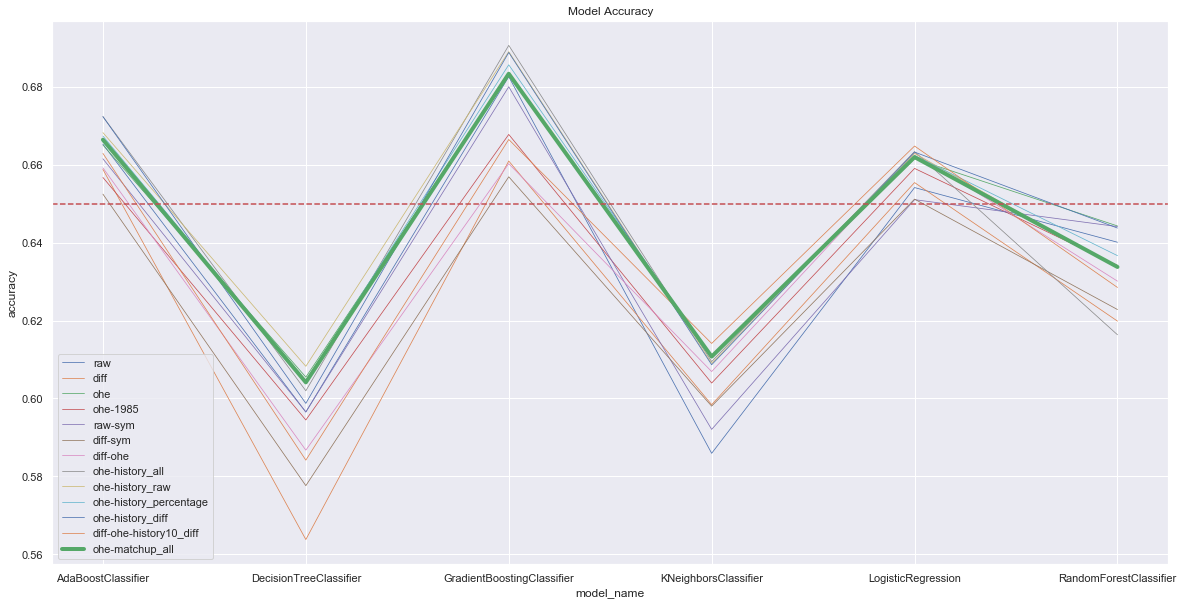

In [30]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


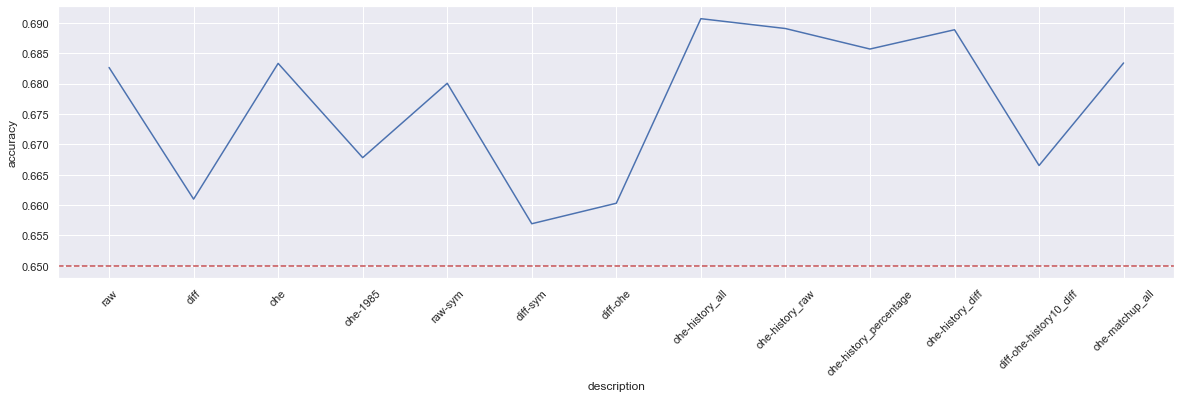

In [31]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == best_model)]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [32]:

current_report = report[(report.model_name == best_model) &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [33]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

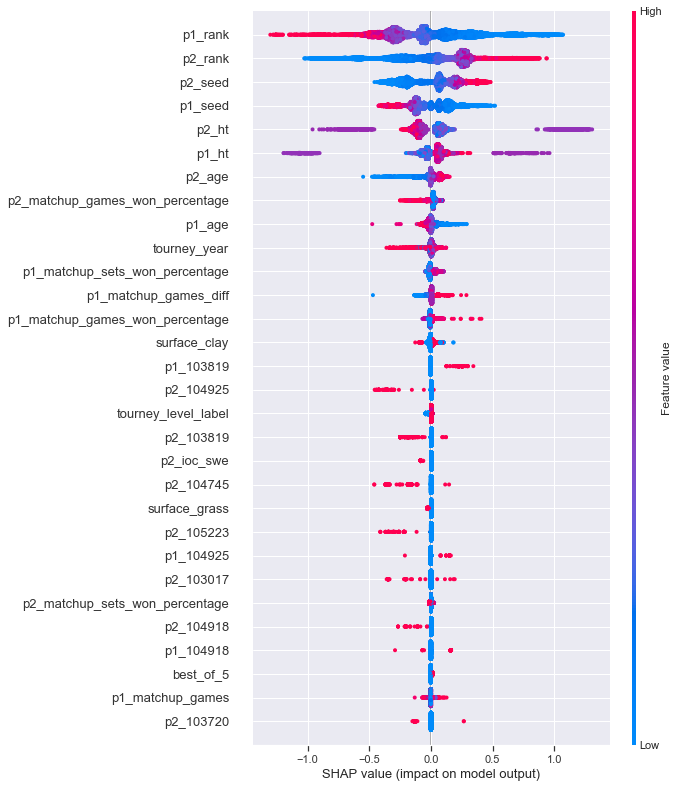

In [34]:
shap.summary_plot(shap_values, X_test, max_display=30)

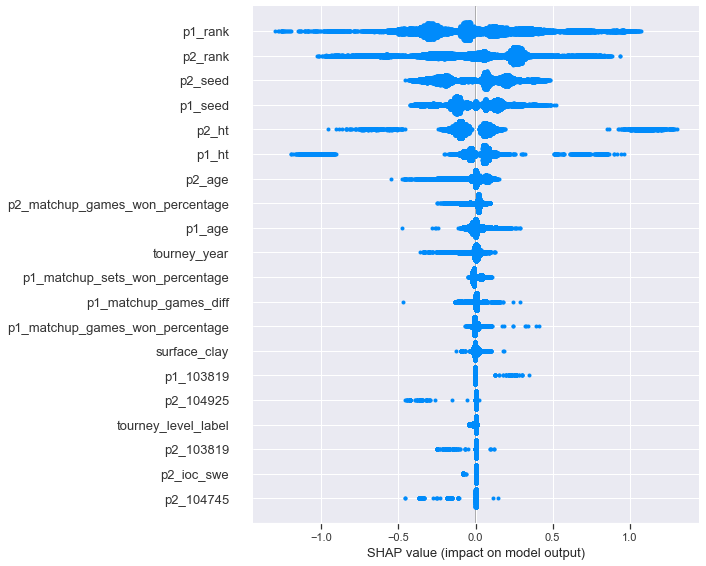

In [35]:
shap.summary_plot(shap_values, feature_names=X_test.columns, title="Feature Importance")

In [36]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-21 03:40
